In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df_dsc = pd.read_csv("data/010_dsc.csv", index_col=0)
df_dsc.head()

,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Masse Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
Nummer,,,,,,,,,
L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,8.34,5.675,130.7
L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,8.49,4.522,130.8
L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,7.86,5.084,130.7
L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,NaN,8.59,4.175,130.3
L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,NaN,8.39,5.796,130.5


C:\Users\konra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


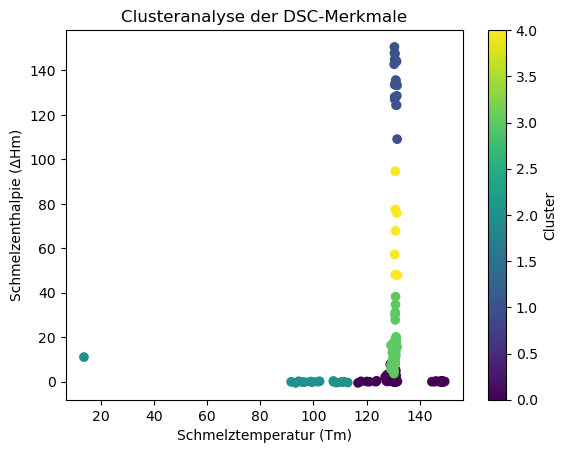

In [12]:
# Datenvorbereitung und Clustering (wie in deinem Code)
features = df_dsc[['Tm_C', 'dHm_J/g', 'mProben_mg']].dropna()
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_dsc.loc[features.index, 'Cluster'] = kmeans.fit_predict(features)

# Streudiagramm der Cluster
plt.scatter(df_dsc['Tm_C'], df_dsc['dHm_J/g'], c=df_dsc['Cluster'], cmap='viridis')
plt.xlabel('Schmelztemperatur (Tm)')
plt.ylabel('Schmelzenthalpie (ΔHm)')
plt.title('Clusteranalyse der DSC-Merkmale')
plt.colorbar(label='Cluster')
plt.show()


In [14]:
# Kreuztabelle: Cluster vs. Matrix
crosstab = pd.crosstab(df_dsc.loc[features.index, 'Cluster'], df_dsc.loc[features.index, 'Matrix'])
print("Cluster vs. Matrix Verteilung:")
crosstab

Cluster vs. Matrix Verteilung:


Matrix,Modellsand,Sand,Sediment Elbe,Sediment Weißeritz
Cluster,,,,
0,52,37,37,40
1,0,18,1,0
2,1,2,10,5
3,38,0,8,18
4,0,0,7,0


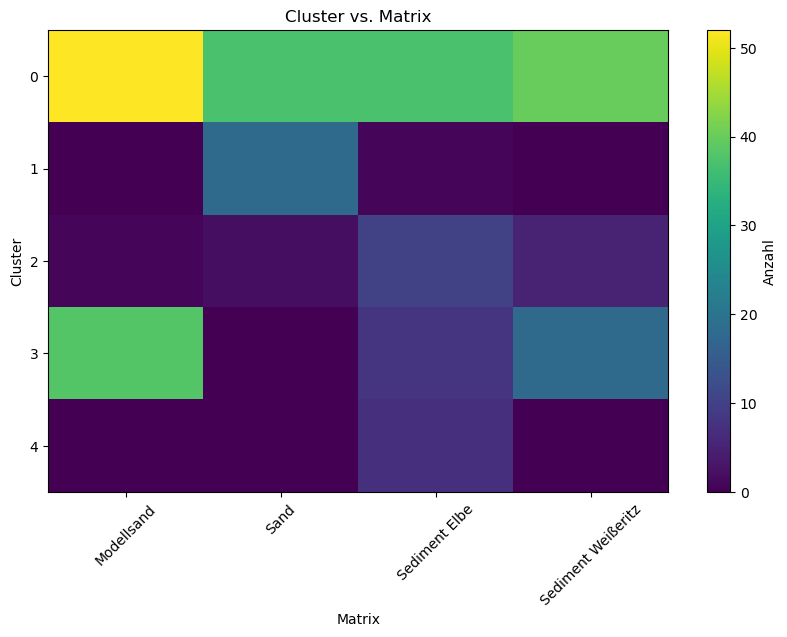

In [11]:
# Optional: Visualisiere die Kreuztabelle als Heatmap
plt.figure(figsize=(10, 6))
plt.imshow(crosstab, cmap='viridis', aspect='auto')
plt.colorbar(label='Anzahl')
plt.xticks(range(len(crosstab.columns)), crosstab.columns, rotation=45)
plt.yticks(range(len(crosstab.index)), crosstab.index)
plt.xlabel('Matrix')
plt.ylabel('Cluster')
plt.title('Cluster vs. Matrix')
plt.show()